# The Gaussian function and a Gaussian hill

In this part of the Jupyter Notebook we perform some simple but instructive DEM analysis. We will start by generating a Gaussian hill. Because we can take the analytical derivative of the 2D Gaussian function, we can compare gridded slope estimates with analytical solution to better understand the true nature of slope (and aspect) calculations. In a second step, we will compare slope distributions derived from different DEM resolutions - again using the Gaussian Hill as an example that we sample at different resolutions.

Consider the 2D Gaussian Function:
$$G(x,y,\sigma) = \frac{1}{2\pi \sigma^2} e^{-\frac{x^2 + y^2}{2 \sigma^2}}$$

For our purposes, we will use a constant $\sigma=1$ and simplify
$$G(x,y) = e^{-x^2 - y^2}$$

When taking the analytical solution, you can simplify this by assuming same x and y distances and stepsize and replace (x,y) with the distance $r$.


In the first step, the function `gaussian_hill_elevation` creates a x, y grid with `meshgrid` for a given number of steps. Next, the corresponding z value of the Gaussian function is caluclated.

In [185]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

def gaussian_hill_elevation(n, b = 2.5):
    x, y = np.meshgrid(np.linspace(-b,b,n),
                       np.linspace(-b,b,n))
    z = np.exp(-x*x-y*y)
    return (x, y, z)

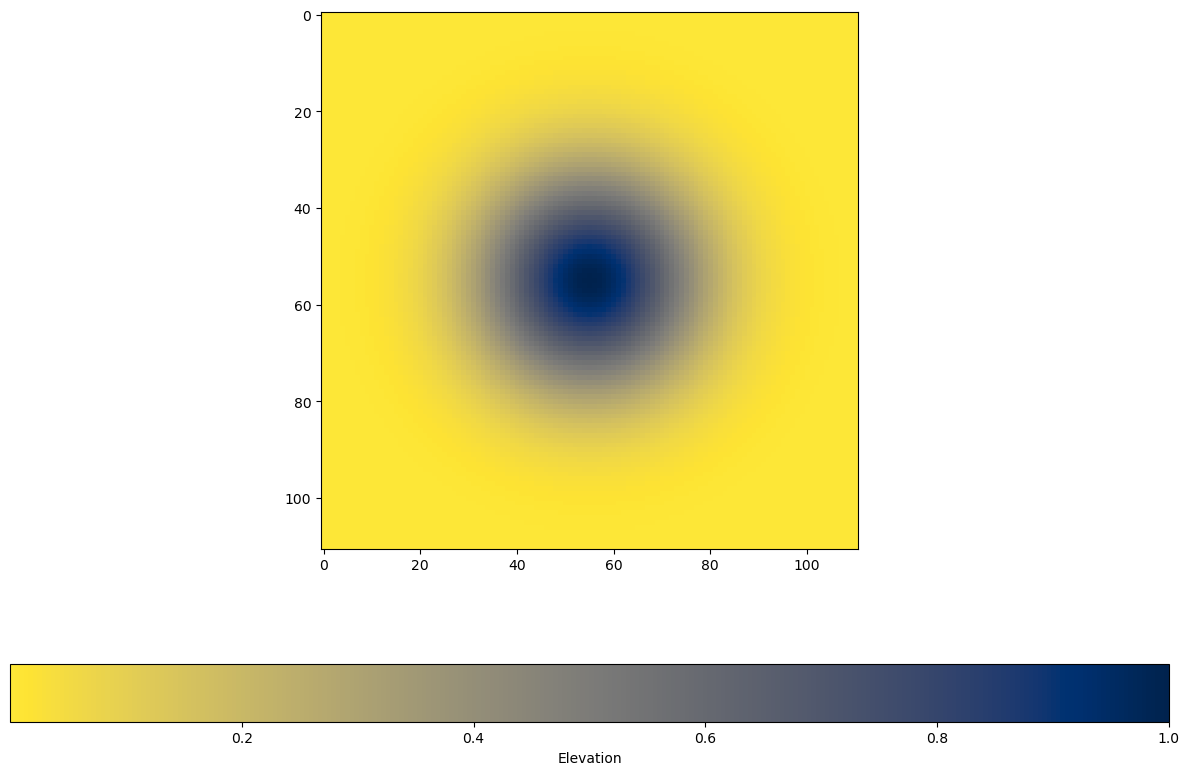

In [186]:
#%matplotlib notebook
#Generating 2D plot
n = 111
fg, ax = plt.subplots(1, 1)
x, y, z = gaussian_hill_elevation(n)

im = ax.imshow(z, cmap = plt.cm.cividis_r)
cb = fg.colorbar(im, ax = ax, orientation = 'horizontal')
cb.set_label('Elevation')
fg.tight_layout()

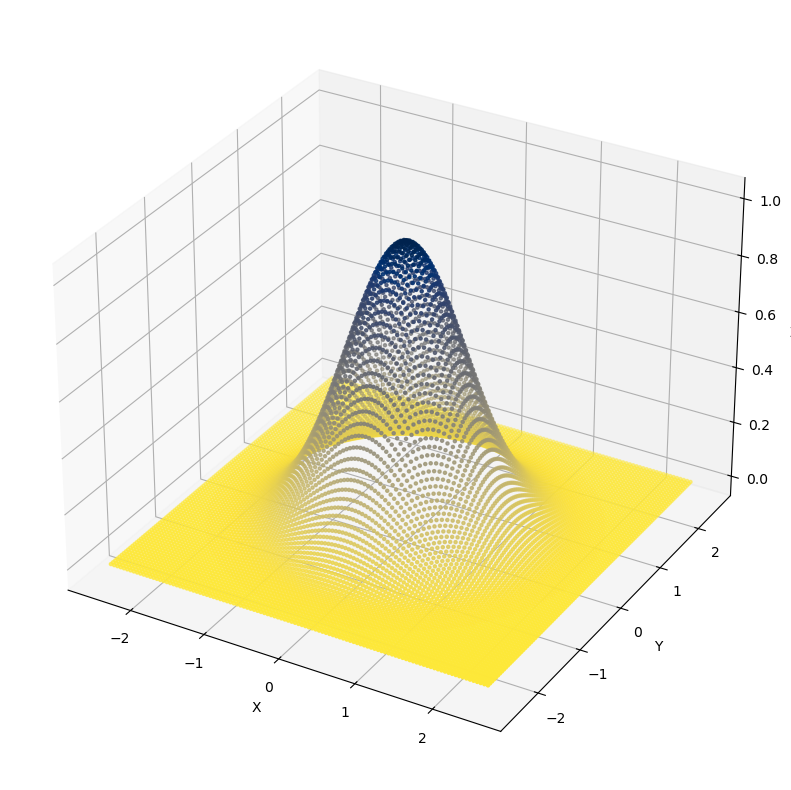

In [187]:
# Plot 3D view using elevation as color code
from mpl_toolkits.mplot3d import Axes3D  
fg = plt.figure()
ax = fg.add_subplot(111, projection='3d')
ax.scatter(x.ravel(), y.ravel(), z.ravel(), 
           s=5, c=z.ravel(), cmap='cividis_r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fg.tight_layout()

## Make a 2D array for each time step

Let's create a toy model to simulate changing topography. The idea is to make a simple model for dynamic topography. We use a growing Gaussian Hill to simulate a magma intrusion (or tectonic growth).

In [188]:
np.random.seed( 42 )
print(np.random.random(1))
print(np.random.random(1))

[0.37454012]
[0.95071431]


In [270]:
def gaussian_hill_elevation(n, b = 2.5):
    x, y = np.meshgrid(np.linspace(-b,b,n),
                       np.linspace(-b,b,n))
    z = np.exp(-x*x-y*y)
    return (x, y, z)

n = 1001 #
ts = 100
gh_ts = np.zeros( (ts, n, n), dtype=np.float32)
#gh_ts.fill(np.nan)
np.random.seed( 42 )

for i in range(1,ts):
    # gh_ts[i, :, :] = gaussian_hill_elevation(n)[2] * i
    # gh_ts[i, :, :] = gaussian_hill_elevation(n)[2] * i + (np.random.random((n,n)) * i/100)
    gh_ts[i, :, :] =  gh_ts[i-1, :, :] + gaussian_hill_elevation(n)[2] * i + (np.random.random((n,n)) * i/10)

print(gh_ts.shape)

(100, 1001, 1001)


## Plotting individual time steps

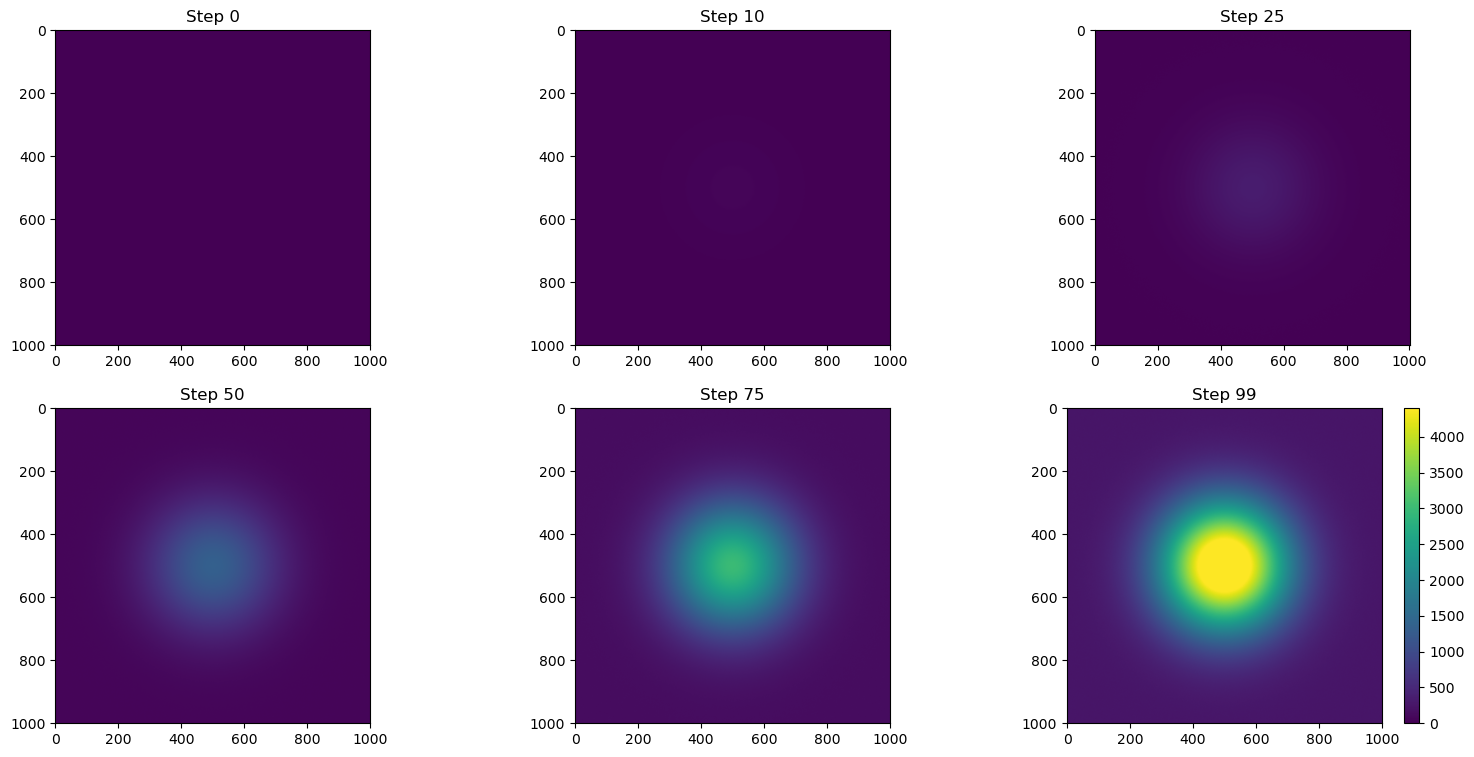

In [271]:
vmax = np.percentile(gh_ts, 99.9)
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(19, 9))

ax[0,0].imshow(gh_ts[0,:,:], vmin=0, vmax=vmax) 
ax[0,0].set_title('Step 0')

ax[0,1].imshow(gh_ts[10,:,:], vmin=0, vmax=vmax) 
ax[0,1].set_title('Step 10')

ax[0,2].imshow(gh_ts[25,:,:], vmin=0, vmax=vmax) 
ax[0, 2].set_title('Step 25')

ax[1,0].imshow(gh_ts[50,:,:], vmin=0, vmax=vmax) 
ax[1,0].set_title('Step 50')

ax[1,1].imshow(gh_ts[75,:,:], vmin=0, vmax=vmax) 
ax[1,1].set_title('Step 75')

im6=ax[1,2].imshow(gh_ts[99,:,:], vmin=0, vmax=vmax) 
ax[1,2].set_title('Step 99')

plt.colorbar(im6, ax=ax[1,2])

In [272]:
plt.plot(gh_ts[:,int(n/2),int(n/2)])

## Plot profiles of dynamic topography

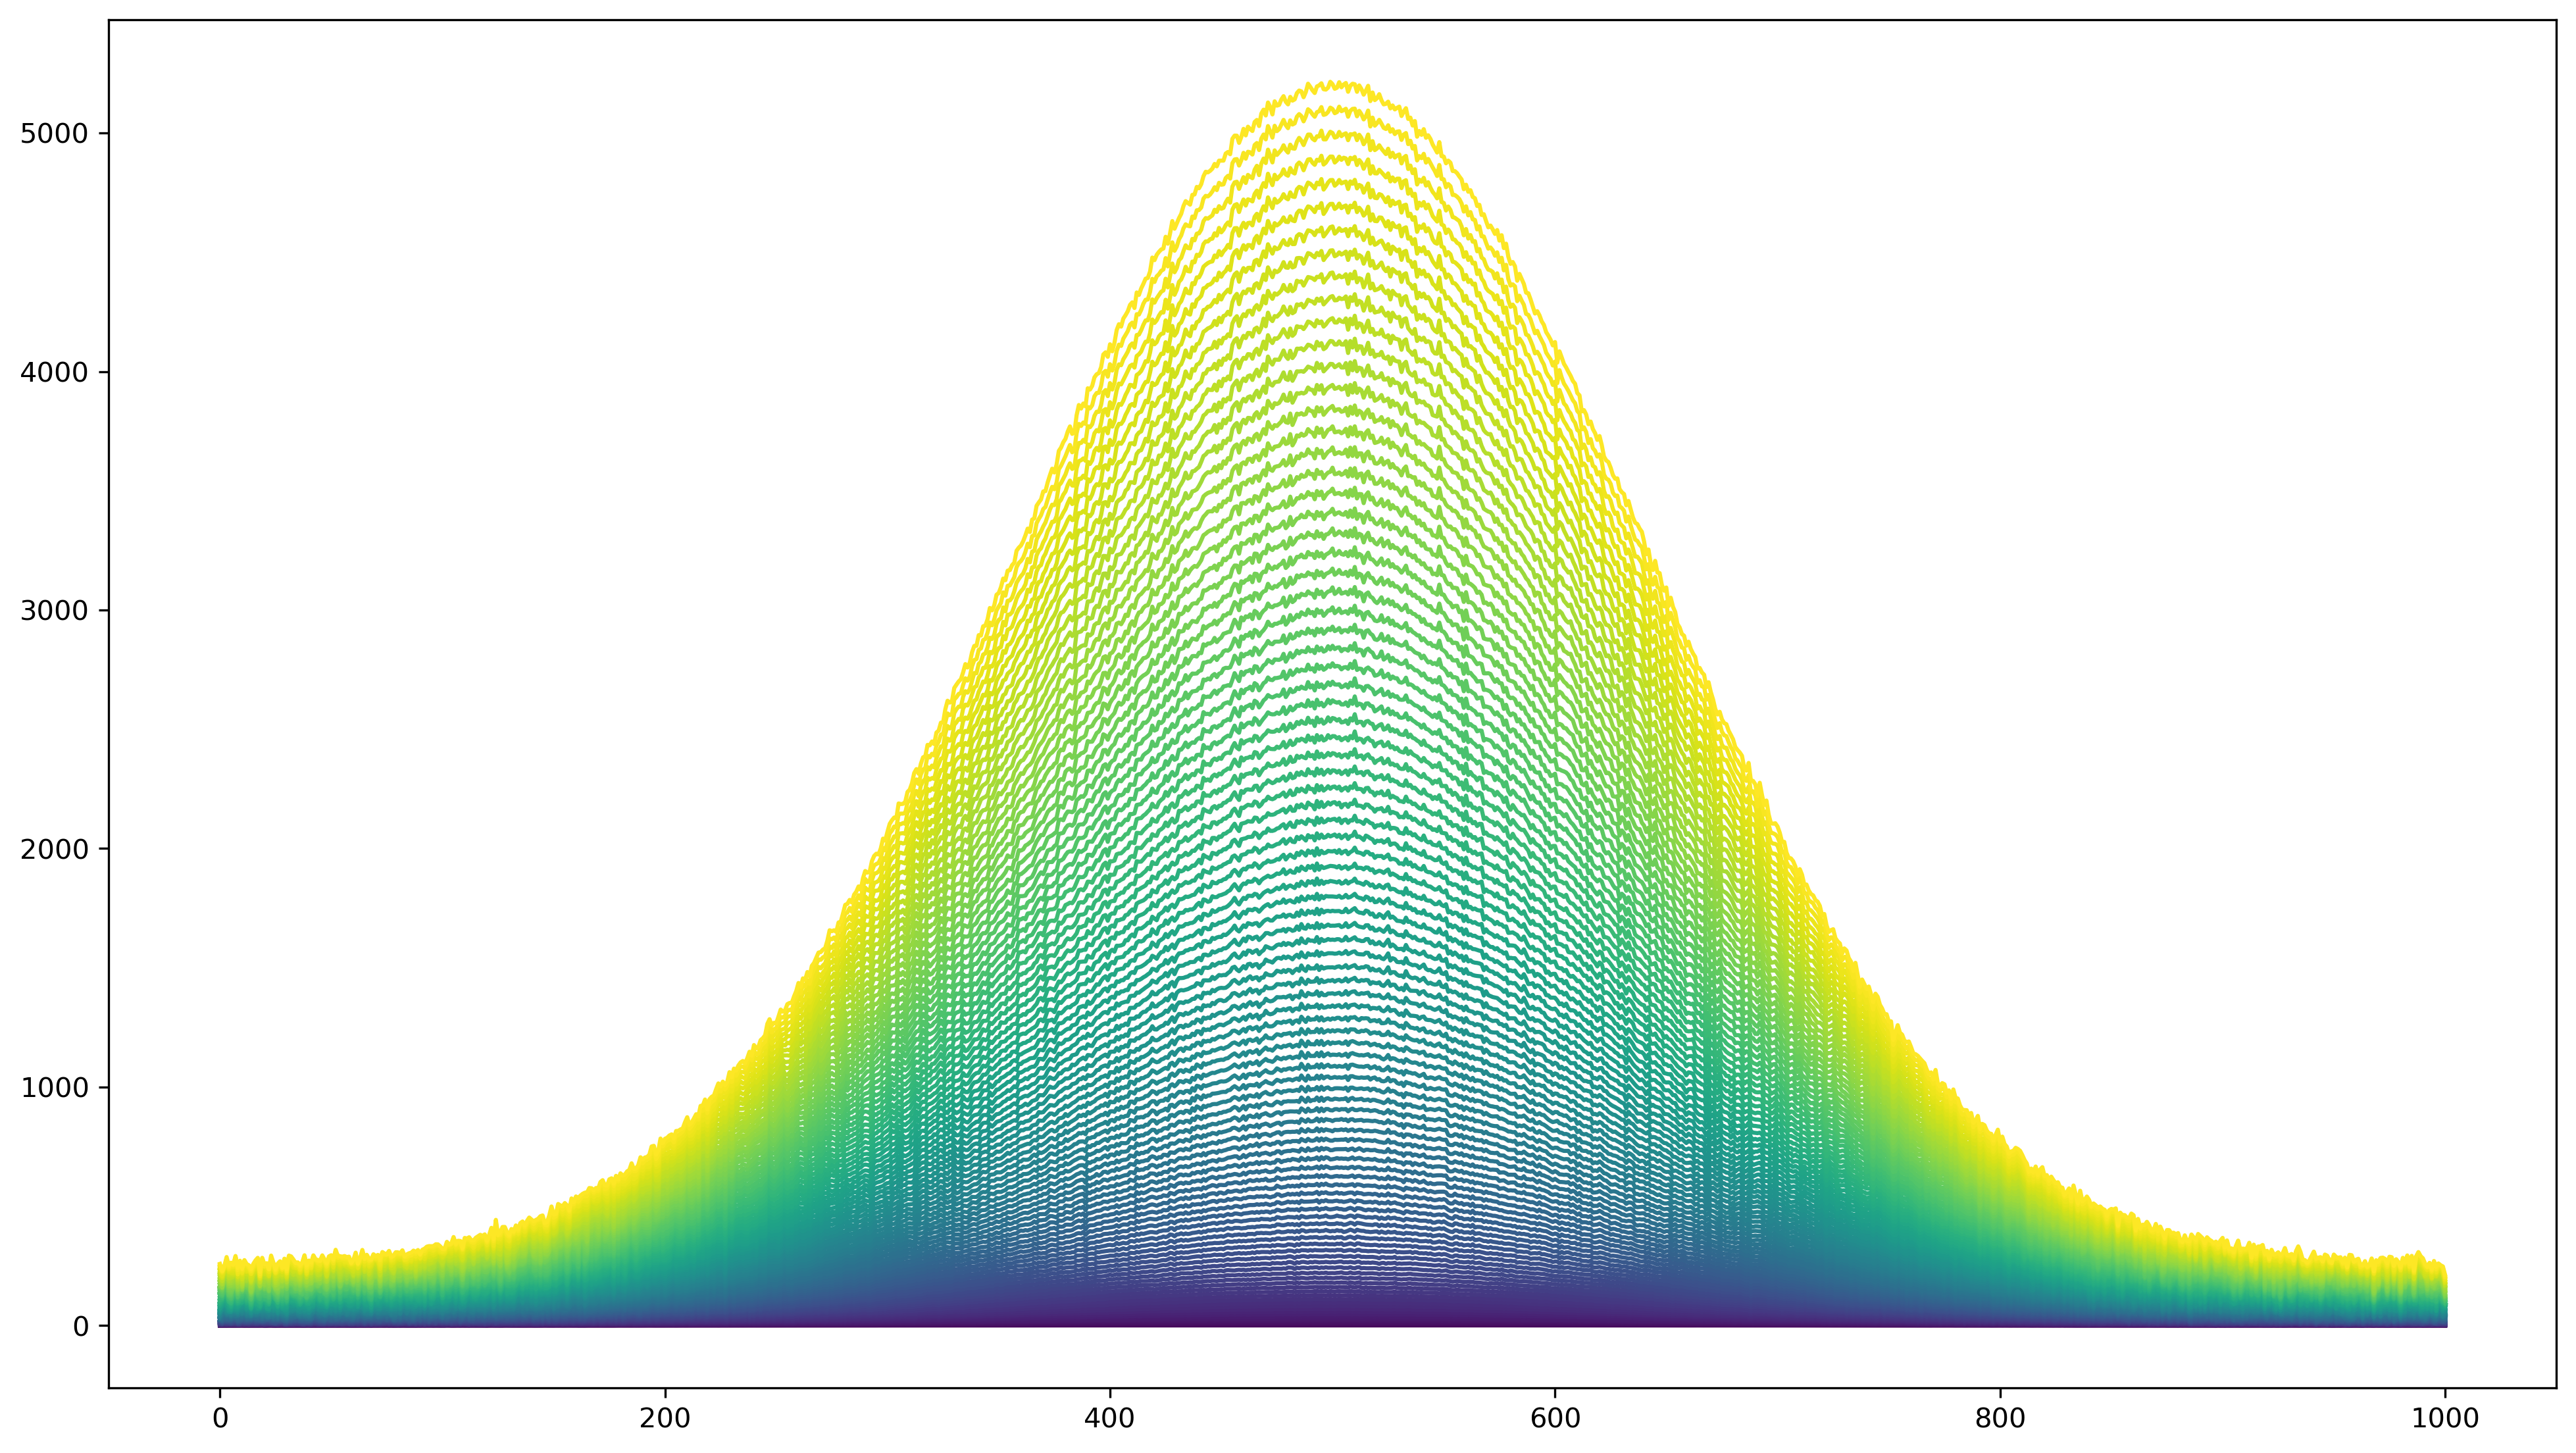

In [273]:
n = gh_ts.shape[0]
colors = plt.cm.viridis(np.linspace(0,1,n))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 9), dpi=300)
for i in range(gh_ts.shape[0]):
    ax.plot(gh_ts[i,500,:], color=colors[i]);

### Showing only every 10s timestep

In [274]:
labels = ['%02d'%x for x in A]
labels

['00', '10', '20', '30', '40', '50', '60', '70', '80', '90']

In [275]:
# make 5 lines
n_lines = 10
A = np.int32(np.linspace(0, gh_ts.shape[0], n_lines, endpoint=False))
x = gh_ts[A,500,:].T
# create colormap
cm = plt.cm.viridis(np.linspace(0, 1, n_lines))
labels = ['%02d'%x for x in A]

# plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 9), dpi=300)
ax.set_prop_cycle('color', list(cm))
ax.plot(x, label=labels)
ax.legend()
ax.set_ylabel('elevation')
ax.set_xlabel('distance along profile')
ax.grid()

## Animations (doesn't work in jupyter lab)

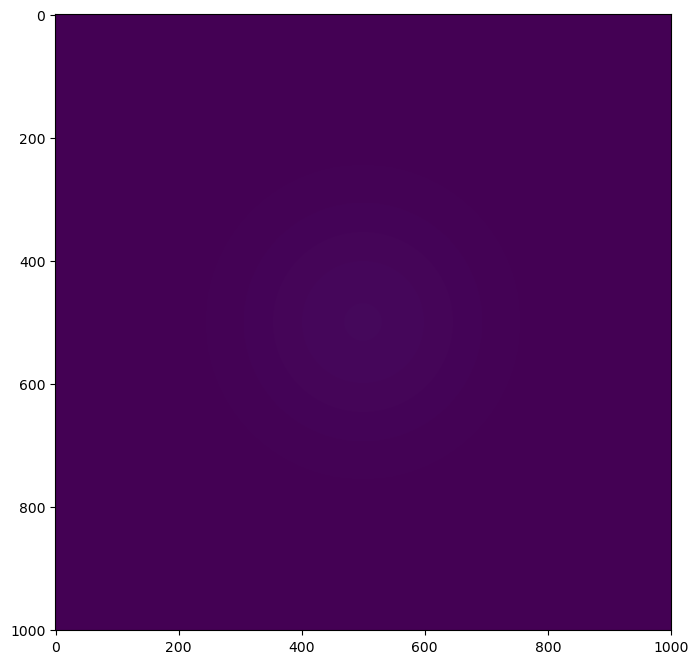

In [276]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def gaussian_hill_elevation(n, b = 2.5):
    x, y = np.meshgrid(np.linspace(-b,b,n),
                       np.linspace(-b,b,n))
    z = np.exp(-x*x-y*y)
    return (x, y, z)

n = 1001
ts = 100
gh_ts = np.empty( (ts, n, n), dtype=np.float32)
gh_ts.fill(np.nan)

for i in range(ts):
    gh_ts[i, :, :] = gaussian_hill_elevation(n)[2] * i


fig = plt.figure()
im = plt.imshow(gh_ts[0,:,:], vmin=0, vmax=100, animated=True)

counter = 0
def updatefig(*args):
    global counter
    counter += 1
    im.set_array(gh_ts[counter,:,:])
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=1, blit=True, cache_frame_data=False)
plt.show()

# DEM slope and gradient analysis

But what exactly does numpy gradient do?

- *The gradient is computed using central differences in the interior and first differences at the boundaries.*
- *The default distance is 1*

Step-by-step, the calculations are:
At the boundaries step size is only 1:
```python
dy[0] = (y[1]-y[0])/step_size
```

Everywhere else:
```python
dy[1] = (y[2]-y[0])/step_size * 2
```

![Central Difference Theorem (Wikipedia)](img/FiniteDifferences.png)

In [277]:
def np_slopem(z, stepsize=1):
    dx, dy = np.gradient(z, stepsize)
    return np.arctan(np.sqrt(dx*dx+dy*dy))

x, y, z = gaussian_hill_elevation(101)
gh_slopem = np_slopem(z, stepsize=1)

In [278]:
plt.imshow(z), plt.colorbar()

(<matplotlib.image.AxesImage at 0x75a8541c3560>,
 <matplotlib.colorbar.Colorbar at 0x75a85415f7d0>)

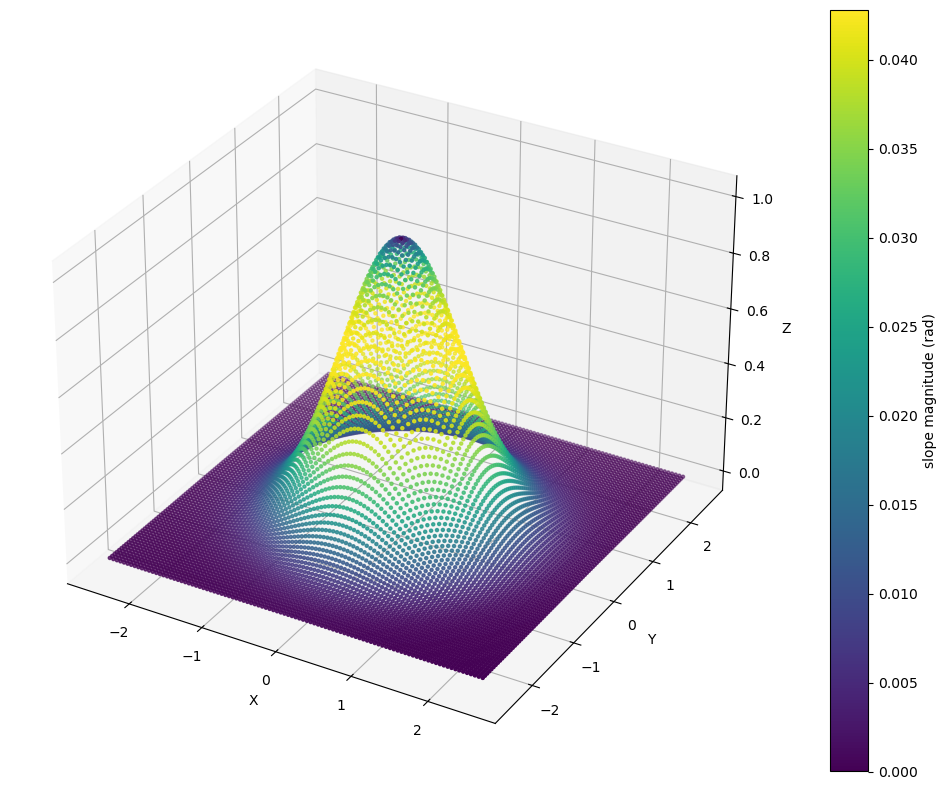

In [279]:
# Plot 3D view using elevation as color code
from mpl_toolkits.mplot3d import Axes3D  
fg = plt.figure()
ax = fg.add_subplot(111, projection='3d')
im0 = ax.scatter(x.ravel(), y.ravel(), z.ravel(), 
           s=5, c=gh_slopem.ravel(), cmap='viridis', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
h = plt.colorbar(im0, ax=ax)
h.set_label('slope magnitude (rad)')
fg.tight_layout()

# Calculate the slope field for each time step

(<matplotlib.image.AxesImage at 0x75a853c33560>,
 <matplotlib.colorbar.Colorbar at 0x75a853c4f350>)

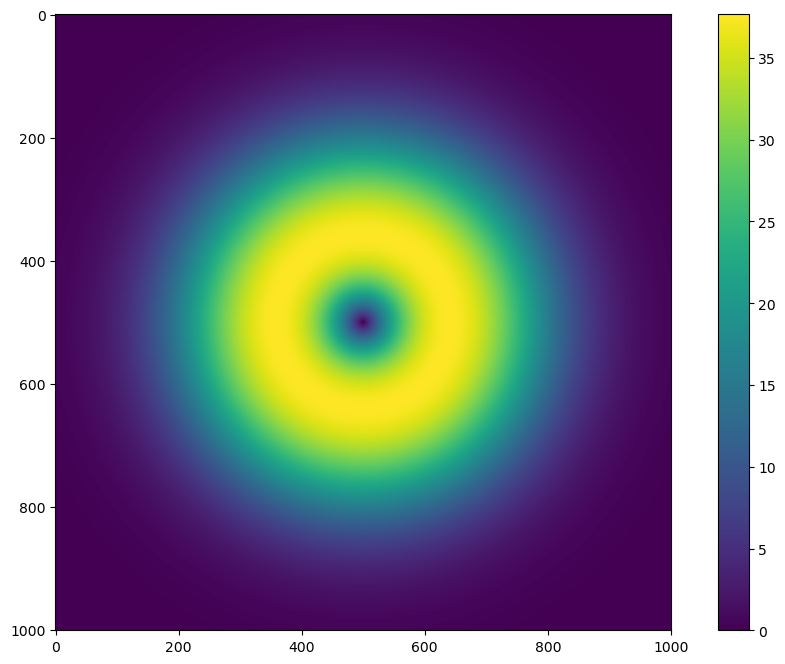

In [284]:
i=90
plt.imshow(np.rad2deg(np_slopem(gh_ts[i, :, :], stepsize=0.5))), plt.colorbar()

# Build a simple landscape evolution model

In [239]:
current_dem_slope = np.empty_like(gh_ts)
current_dem_slope.fill(np.nan)

for i in range(1,ts):
    current_dem = gh_ts[i, :, :]
    slope_dem = np.rad2deg(np_slopem(current_dem, stepsize=0.5))
    idx30_x, idx30_y = np.where(slope_dem > 30)
    for j in range(len(idx30_x)):
        # each cell with slope above 30 will receive the median elevation of the 3x3 surrounding cells
        if idx30_x[j]>0 and idx30_x[j]<len(idx30_x) and idx30_y[j]>0 and idx30_y[j]<len(idx30_y):
            ccurrend_dem = current_dem[idx30_x[j]-1:idx30_x[j]+2,idx30_y[j]-1:idx30_y[j]+2]
        elif idx30_x[j]>0 and idx30_x[j]<len(idx30_x) and idx30_y[j]== 0:
            ccurrend_dem = current_dem[idx30_x[j]-1:idx30_x[j]+2,idx30_y[j]:idx30_y[j]+2]
        elif idx30_x[j]>0 and idx30_x[j]<len(idx30_x) and idx30_y[j]== len(idx30_y):
            ccurrend_dem = current_dem[idx30_x[j]-1:idx30_x[j]+2,idx30_y[j]-1:idx30_y[j]]
        elif idx30_y[j]>0 and idx30_y[j]<len(idx30_y) and idx30_z[j]== 0:
            ccurrend_dem = current_dem[idx30_x[j]:idx30_x[j]+2,idx30_y[j]-1:idx30_y[j]+2]
        elif idx30_y[j]>0 and idx30_y[j]<len(idx30_y) and idx30_z[j]== len(idx30_z):
            ccurrend_dem = current_dem[idx30_x[j]-1:idx30_x[j],idx30_y[j]-1:idx30_y[j]+2]
        current_dem[idx30_x[j], idx30_y[j]] = np.median(ccurrend_dem)
        gh_ts[i, :, :] = current_dem      
    
        gh_ts[i, :, :] =  gh_ts[i-1, :, :] + gaussian_hill_elevation(n)[2] * i + (np.random.random((n,n)) * i/10)



for i in range(gh_ts.shape[0]):
    current_dem = gh_ts[i, :, :]
    current_dem_slope[i,:,:] = np_slopem(current_dem, stepsize=10)


In [287]:
i=1
current_dem = gh_ts[i, :, :]
slope_dem = np.rad2deg(np_slopem(current_dem, stepsize=0.5))
idx30_x, idx30_y = np.where(slope_dem > 30)
for j in range(len(idx30_x)):
    # each cell with slope above 30 will receive the median elevation of the 3x3 surrounding cells
    if idx30_x[j]>0 and idx30_x[j]<len(idx30_x) and idx30_y[j]>0 and idx30_y[j]<len(idx30_y):
        ccurrend_dem = current_dem[idx30_x[j]-1:idx30_x[j]+2,idx30_y[j]-1:idx30_y[j]+2]
    elif idx30_x[j]>0 and idx30_x[j]<len(idx30_x) and idx30_y[j]== 0:
        ccurrend_dem = current_dem[idx30_x[j]-1:idx30_x[j]+2,idx30_y[j]:idx30_y[j]+2]
    elif idx30_x[j]>0 and idx30_x[j]<len(idx30_x) and idx30_y[j]== len(idx30_y):
        ccurrend_dem = current_dem[idx30_x[j]-1:idx30_x[j]+2,idx30_y[j]-1:idx30_y[j]]
    elif idx30_y[j]>0 and idx30_y[j]<len(idx30_y) and idx30_z[j]== 0:
        ccurrend_dem = current_dem[idx30_x[j]:idx30_x[j]+2,idx30_y[j]-1:idx30_y[j]+2]
    elif idx30_y[j]>0 and idx30_y[j]<len(idx30_y) and idx30_z[j]== len(idx30_z):
        ccurrend_dem = current_dem[idx30_x[j]-1:idx30_x[j],idx30_y[j]-1:idx30_y[j]+2]
    current_dem[idx30_x[j], idx30_y[j]] = np.median(ccurrend_dem)
gh_ts[i, :, :] = current_dem      



TypeError: only integer scalar arrays can be converted to a scalar index

In [301]:
i=90
current_dem = gh_ts[i, :, :]
slope_dem = np.rad2deg(np_slopem(current_dem, stepsize=0.5))
idx30_x, idx30_y = np.where(slope_dem > 30)
j=100
print(current_dem[idx30_x[j]-1:idx30_x[j]+2,idx30_y[j]-1:idx30_y[j]+2])
print(slope_dem[idx30_x[j]-1:idx30_x[j]+2,idx30_y[j]-1:idx30_y[j]+2])


[[26.171858 26.1856   26.198042]
 [26.463322 26.477219 26.489798]
 [26.756693 26.770744 26.783464]]
[[30.187653 30.195435 30.202497]
 [30.35149  30.359325 30.366364]
 [30.51422  30.521948 30.528967]]


(<matplotlib.image.AxesImage at 0x75a853bb7170>,
 <matplotlib.colorbar.Colorbar at 0x75a853bb62d0>)

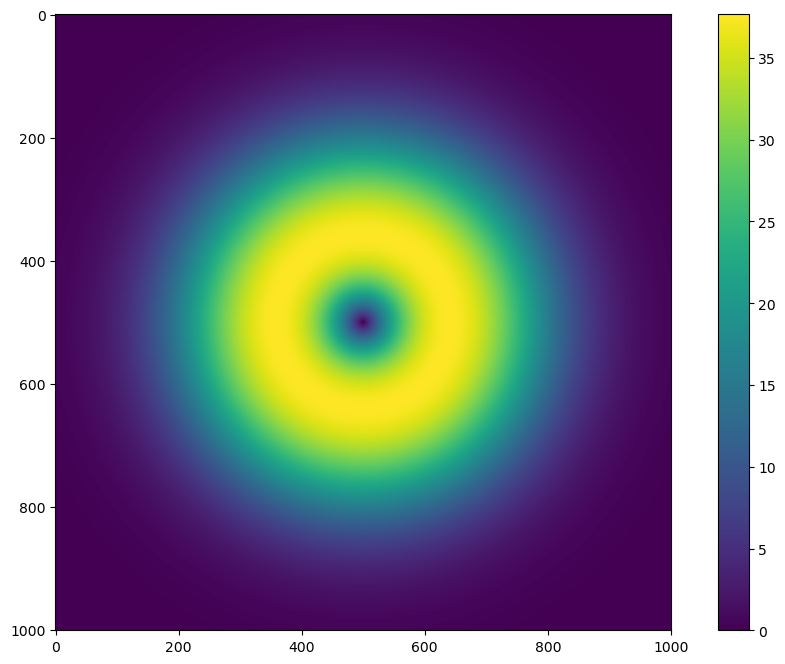

In [300]:
plt.imshow(slope_dem), plt.colorbar()

In [243]:
vmax = np.percentile(current_dem_slope, 99)
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(19, 9))

ax[0,0].imshow(current_dem_slope[0,:,:], vmin=0, vmax=vmax) 
ax[0,0].set_title('Step 0')

ax[0,1].imshow(current_dem_slope[10,:,:], vmin=0, vmax=vmax) 
ax[0,1].set_title('Step 10')

ax[0,2].imshow(current_dem_slope[25,:,:], vmin=0, vmax=vmax) 
ax[0, 2].set_title('Step 25')

ax[1,0].imshow(current_dem_slope[50,:,:], vmin=0, vmax=vmax) 
ax[1,0].set_title('Step 50')

ax[1,1].imshow(current_dem_slope[75,:,:], vmin=0, vmax=vmax) 
ax[1,1].set_title('Step 75')

im6=ax[1,2].imshow(current_dem_slope[99,:,:], vmin=0, vmax=vmax) 
ax[1,2].set_title('Step 99')

plt.colorbar(im6, ax=ax[1,2])